### --- set-up ---

In [1]:
pip install bitfinex-tencars

Note: you may need to restart the kernel to use updated packages.


In [1]:
import bitfinex
import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt

## 1. Extracting time series data

In [23]:
# Define query parameters
pair = 'BTCUSD' # Currency pair of interest
TIMEFRAME = '1h'
TIMEFRAME_S = 360 # seconds in TIMEFRAME

# Define the start date
t_start = datetime.datetime(2020, 1, 1, 0, 0)
t_start = time.mktime(t_start.timetuple()) * 1000

# Define the end date
t_stop = datetime.datetime(2021, 1, 1, 0, 0)
t_stop = time.mktime(t_stop.timetuple()) * 1000

def fetch_data(start, stop, symbol, interval, TIMEFRAME_S):
    limit = 10000    # maximum data points from Bitfinex API 
    # Create api instance
    api_v2 = bitfinex.bitfinex_v2.api_v2()
    hour = TIMEFRAME_S * 1000
    step = hour * limit
    data = []

    total_steps = (stop-start)/hour
    while total_steps > 0:
        if total_steps < limit: # recalculating ending steps
            step = total_steps * hour

        end = start + step
        data += api_v2.candles(symbol=symbol, interval=interval, limit=limit, start=start, end=end)
        print(pd.to_datetime(start, unit='ms'), pd.to_datetime(end, unit='ms'), "steps left:", total_steps)
        start = start + step
        total_steps -= limit
        time.sleep(1.5)
    return data

result = fetch_data(t_start, t_stop, pair, TIMEFRAME, TIMEFRAME_S)
names = ['Date', 'Open', 'Close', 'High', 'Low', 'Volume']
df = pd.DataFrame(result, columns=names)
df.drop_duplicates(inplace=True)
df['Date'] = pd.to_datetime(df['Date'], unit='ms')
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.to_csv(f"{pair}_{TIMEFRAME}.csv")

No keys, only access to public API functions
2019-12-31 23:00:00 2020-02-11 15:00:00 steps left: 87840.0
2020-02-11 15:00:00 2020-03-24 07:00:00 steps left: 77840.0
2020-03-24 07:00:00 2020-05-04 23:00:00 steps left: 67840.0
2020-05-04 23:00:00 2020-06-15 15:00:00 steps left: 57840.0
2020-06-15 15:00:00 2020-07-27 07:00:00 steps left: 47840.0
2020-07-27 07:00:00 2020-09-06 23:00:00 steps left: 37840.0
2020-09-06 23:00:00 2020-10-18 15:00:00 steps left: 27840.0
2020-10-18 15:00:00 2020-11-29 07:00:00 steps left: 17840.0
2020-11-29 07:00:00 2020-12-31 23:00:00 steps left: 7840.0


## 2. Creating chart

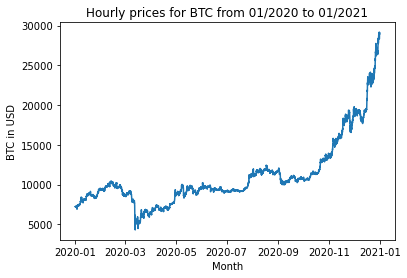

In [27]:
# Hourly prices for BTC from 01/2020 to 01/2021
plt.plot(df['Close'],'-')
plt.title('Hourly prices for BTC from 01/2020 to 01/2021')
plt.xlabel('Month')
plt.ylabel('BTC in USD')
plt.show()

## 3. Further descriptive data

In [42]:
# All-time high within timeframe
max_price = max(df['Close'])
print("The maximum hourly price in the given timeframe was " + str(max_price) + ".")

The maximum hourly price in the given timeframe was 29154.0.


In [43]:
# All-time low within time frame
min_price = min(df['Close'])
print("The minimum hourly price in the given timeframe was " + str(min_price) + ".")

The minimum hourly price in the given timeframe was 4297.1.
